In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [4]:
df = pd.read_csv("C:\\Users\\salah\\water_potability.csv.csv")

In [5]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

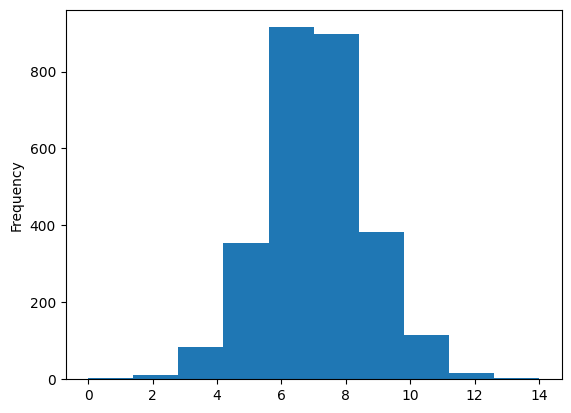

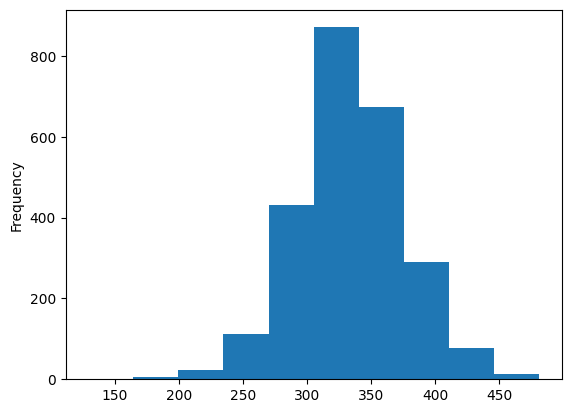

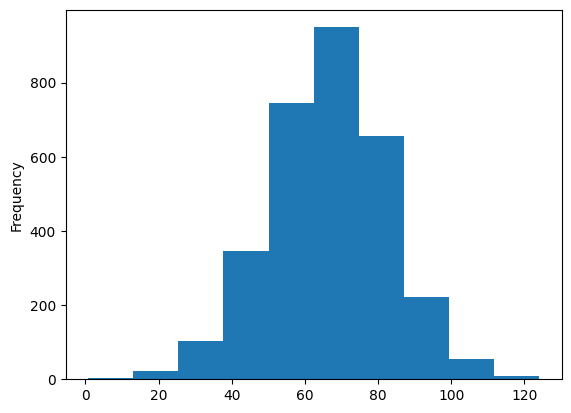

In [10]:
df['ph'].plot(kind='hist')
plt.show()
df['Sulfate'].plot(kind='hist')
plt.show()
df['Trihalomethanes'].plot(kind='hist')
plt.show()

In [11]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [12]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [13]:
correlation = df.corr()
correlation

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


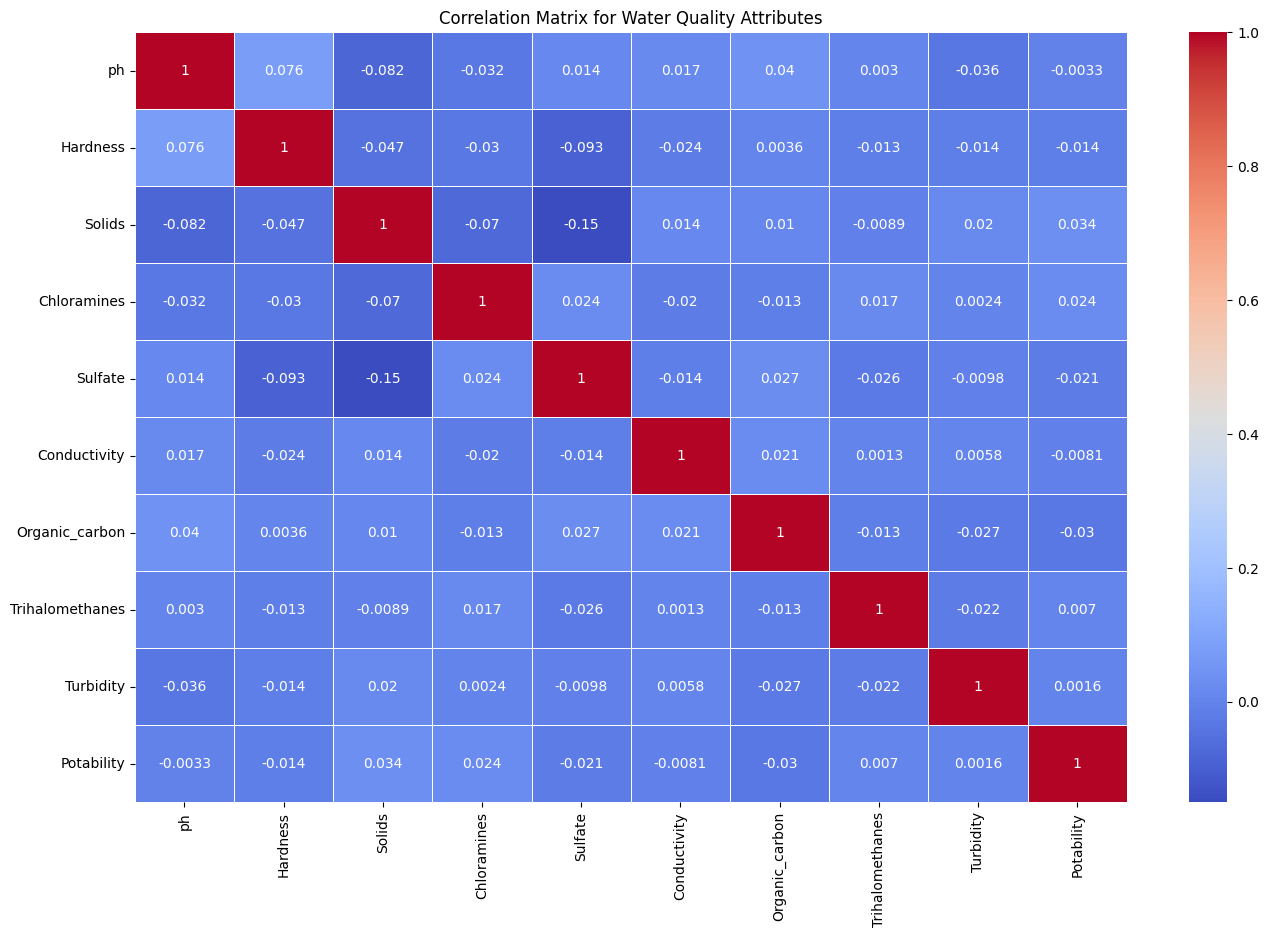

In [14]:
plt.figure(figsize=(16, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm',
            linewidths=0.5)  # Adding annotations to show correlation coefficients
plt.title('Correlation Matrix for Water Quality Attributes')
plt.show()


low correlation between the dependent var and each independent var: either  none of the independent var strongly 
predict water potability on their own or  variables don’t have a strong linear relationship 

# Counting Potability
# 1 for safe water, 0 for not safe water

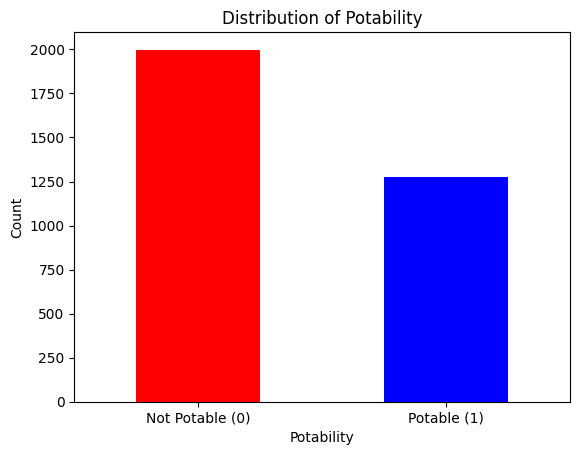

In [15]:
df['Potability'].value_counts().sort_index().plot(kind='bar',
                                                  color=['red', 'blue'])  # red for Not Potable, blue for Potable
plt.xlabel('Potability')
plt.ylabel('Count')
plt.title('Distribution of Potability')
plt.xticks([0, 1], ['Not Potable (0)', 'Potable (1)'], rotation=0)  # Ensure proper label names and orientation
plt.show()

# using the unsampling method to make the data non biased


minority class that  is 1, we need to upsample/increase that class so that there is no bias
we want 1998 sample of class 1, since there are 1998 samples of class 0

In [17]:

row_zero = df[df['Potability'] == 0]
row_one = df[df['Potability'] == 1]

from sklearn.utils import resample
from sklearn.utils import shuffle

df_minority_upsampled = resample(row_one, replace=True, n_samples=1998)  #this is called over sampling
df_balanced = pd.concat([row_zero, df_minority_upsampled])
#  we should use new df ex; df_b to not change in the main df
df_balanced = shuffle(df_balanced)

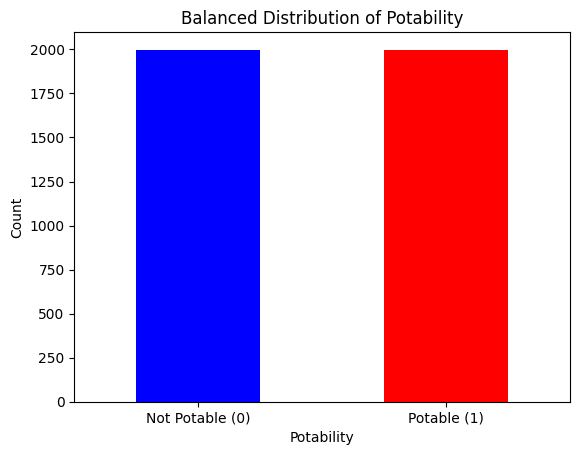

In [18]:
df_balanced['Potability'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Potability')
plt.ylabel('Count')
plt.title('Balanced Distribution of Potability')
plt.xticks([0, 1], ['Not Potable (0)', 'Potable (1)'], rotation=0)
plt.show()

In [19]:
X = df_balanced.drop(['Potability'], axis=1)
y = df_balanced['Potability']
from sklearn.preprocessing import StandardScaler

# Standardizing features
sc = StandardScaler()
features = X.columns
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)


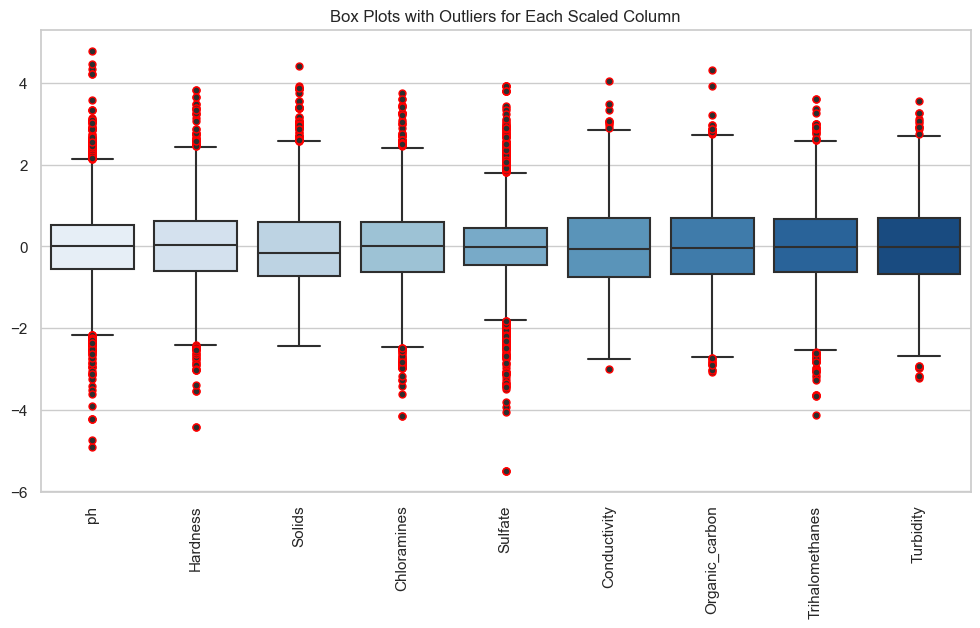

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Blues", n_colors=len(X_scaled.columns))
ax = sns.boxplot(data=X_scaled, palette=palette, linewidth=1.5,
                 flierprops=dict(marker='o', color='red', markeredgecolor='red'))
plt.xticks(rotation=90)
plt.title("Box Plots with Outliers for Each Scaled Column")
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

In [22]:
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [23]:
log_reg = LogisticRegression(class_weight='balanced')

In [24]:

param_grid_log_reg = {
    'C': [0.01, 0.1, 1.0, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Include None instead of 'none'
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'l1_ratio': [None, 0.5],  # Only necessary if 'elasticnet' is used

    'random_state': [42]
}
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5)
grid_log_reg.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_log_reg.best_params_)


Best parameters for Logistic Regression: {'C': 100, 'l1_ratio': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}


In [25]:

log_reg = LogisticRegression(**grid_log_reg.best_params_)

log_reg.fit(X_train, y_train)

logistic_predictions = log_reg.predict(X_test)

logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f'Logistic Regression Accuracy: {logistic_accuracy:.2f}')

print(classification_report(y_test, logistic_predictions))

Logistic Regression Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       391
           1       0.70      0.72      0.71       409

    accuracy                           0.70       800
   macro avg       0.70      0.70      0.70       800
weighted avg       0.70      0.70      0.70       800



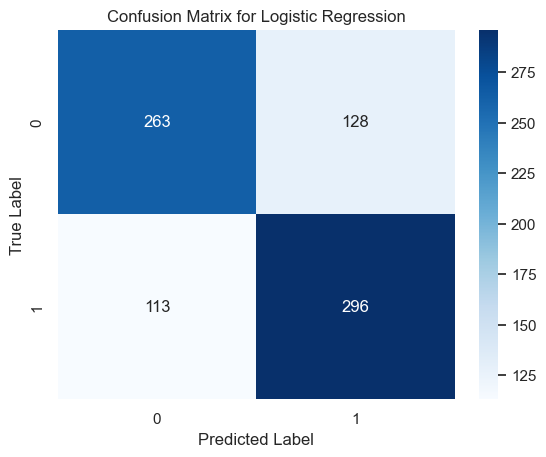

In [26]:
logistic_cm = confusion_matrix(y_test, logistic_predictions)
sns.heatmap(logistic_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [28]:
X_trainT, X_testT, y_trainT, y_testT = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [75]:
para_svm = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_svm = GridSearchCV(SVC(), param_grid=para_svm, cv=5)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]})

In [76]:
print("Best parameters for SVM:", grid_svm.best_params_)


Best parameters for SVM: {'C': 1, 'gamma': 1}


In [77]:
SVM = SVC(**grid_svm.best_params_)


In [78]:
SVM.fit(X_train, y_train)


SVC(C=1, gamma=1)

In [79]:
svm_predictions = SVM.predict(X_test)


In [80]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'Support Vector Machine Accuracy: {svm_accuracy:.2f}')

Support Vector Machine Accuracy: 0.90


In [81]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       393
           1       1.00      0.80      0.89       407

    accuracy                           0.90       800
   macro avg       0.91      0.90      0.90       800
weighted avg       0.92      0.90      0.90       800



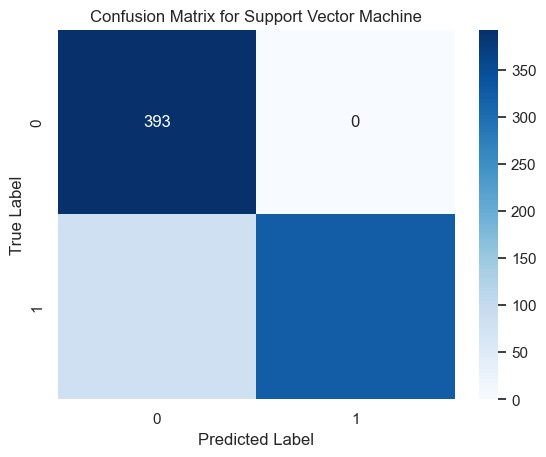

In [82]:
svm_cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Support Vector Machine")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [29]:
params_decision_tree = {'min_samples_split': [2, 10, 30, 50], 'max_depth': [None, 10, 20, 30]}
grid_decision_tree = GridSearchCV(DecisionTreeClassifier(), param_grid=params_decision_tree, cv=5)
grid_decision_tree.fit(X_trainT, y_trainT)

print("Best parameters for Decision Tree:", grid_decision_tree.best_params_)

decision_tree = DecisionTreeClassifier(**grid_decision_tree.best_params_)

decision_tree.fit(X_trainT, y_trainT)

decision_tree_predictions = decision_tree.predict(X_testT)

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}


In [30]:
decision_tree_accuracy = accuracy_score(y_testT, decision_tree_predictions)
print(f'Decision Tree Accuracy: {decision_tree_accuracy:.2f}')

Decision Tree Accuracy: 0.78


In [31]:
print(classification_report(y_testT, decision_tree_predictions))  

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       391
           1       0.75      0.85      0.80       409

    accuracy                           0.78       800
   macro avg       0.78      0.78      0.78       800
weighted avg       0.78      0.78      0.78       800



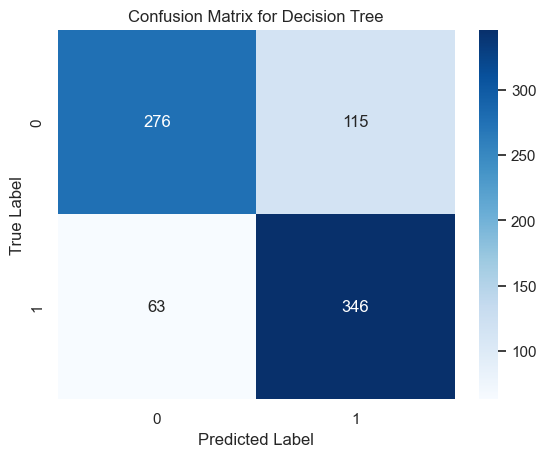

In [32]:
decision_tree_cm = confusion_matrix(y_testT, decision_tree_predictions)
sns.heatmap(decision_tree_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Additional Models

In [33]:
params_random_forest = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 10, 30, 50]  # Minimum number of samples required to split an internal node
}

grid_random_forest = GridSearchCV(RandomForestClassifier(), param_grid=params_random_forest, cv=5)
grid_random_forest.fit(X_trainT, y_trainT)

print("Best parameters for Random Forest:", grid_random_forest.best_params_)
random_forest = RandomForestClassifier(**grid_random_forest.best_params_)

random_forest.fit(X_trainT, y_trainT)
random_forest_predictions = random_forest.predict(X_testT)

Best parameters for Random Forest: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 150}


In [34]:
random_forest_accuracy = accuracy_score(y_testT, random_forest_predictions)
print(f'Random Forest Accuracy: {random_forest_accuracy:.2f}') 

Random Forest Accuracy: 0.84


In [35]:
print(classification_report(y_testT, random_forest_predictions))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       391
           1       0.86      0.81      0.84       409

    accuracy                           0.84       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.84      0.84      0.84       800



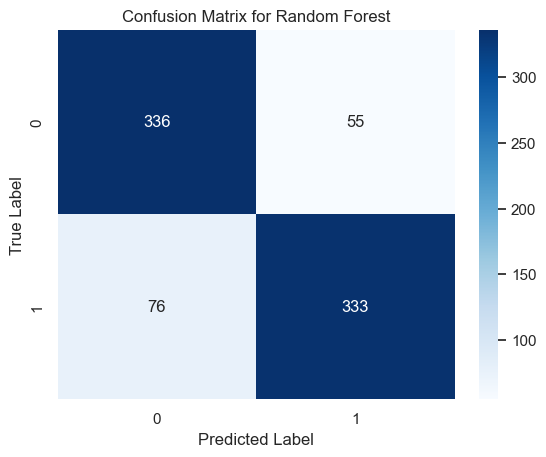

In [36]:
random_forest_cm = confusion_matrix(y_testT, random_forest_predictions)
sns.heatmap(random_forest_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [37]:
params_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=params_knn, cv=5)
grid_knn.fit(X_train, y_train)


print("Best parameters for KNN:", grid_knn.best_params_)
knn = KNeighborsClassifier(**grid_knn.best_params_)

knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [38]:
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'KNN Accuracy: {knn_accuracy:.2f}')

KNN Accuracy: 0.79


In [39]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77       391
           1       0.75      0.88      0.81       409

    accuracy                           0.79       800
   macro avg       0.80      0.79      0.79       800
weighted avg       0.80      0.79      0.79       800



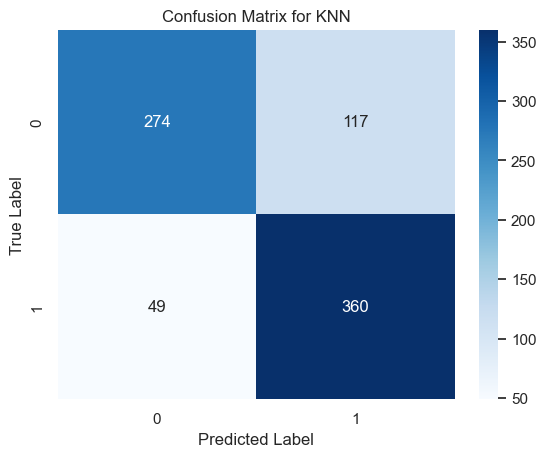

In [40]:
knn_cm = confusion_matrix(y_test, knn_predictions)
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from joblib import dump

# Assuming logi_reg, SVM, and decision_tree are your trained models
models = {
    'Logistic_Regression': log_reg,
    'SVM': SVM,
    'Decision_Tree': decision_tree
}

# Save each model in a separate joblib file
for model_name, model in models.items():
    dump(model, f"{model_name}.joblib")

    # Assuming `sc` is your StandardScaler instance
    dump(sc, 'scaler.joblib')
    dump(poly, 'poly.joblib')